In [1]:
# Confidence Intervals Calculation using T-Procedure
# ---------------------------------------------------
# This notebook demonstrates how to calculate Confidence Intervals (CI)
# for Titanic dataset using T-distribution because population SD is unknown.

# ---------------------------------------------------
# STEP 1: Import Libraries
# ---------------------------------------------------
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [2]:
# ---------------------------------------------------
# STEP 2: Load Titanic Dataset
# ---------------------------------------------------
# Assuming files 'train.csv' and 'test.csv' exist in the current directory.
# If not, we will simulate data for demonstration.

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
# Merge datasets
df = pd.concat([train_df, test_df], ignore_index=True)
# Keep only 'Fare' column and drop missing values
df = df[['Fare']].dropna()

print(f"Total records in dataset: {len(df)}")
print(df.head())

Total records in dataset: 1308
      Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500


In [3]:
# ---------------------------------------------------
# STEP 3: Sampling
# ---------------------------------------------------
# Perform multiple random samples to apply Central Limit Theorem
n_samples = 10        # Number of samples
sample_size = 30      # Size of each sample
samples = []

for _ in range(n_samples):
    sample = df['Fare'].sample(n=sample_size, replace=False)
    samples.append(sample)

In [4]:
# ---------------------------------------------------
# STEP 4: Calculate Sample Means and SDs
# ---------------------------------------------------
sample_means = [s.mean() for s in samples]
sample_stds = [s.std(ddof=1) for s in samples]

# Point Estimate = Mean of sample means
point_estimate = np.mean(sample_means)
avg_sample_std = np.mean(sample_stds)

# Degrees of Freedom
df_t = sample_size - 1

print("\n--- Sampling Summary ---")
print(f"Point Estimate (Mean of sample means): {round(point_estimate, 2)}")
print(f"Average Sample SD: {round(avg_sample_std, 2)}")
print(f"Sample Size: {sample_size}, Degrees of Freedom: {df_t}")


--- Sampling Summary ---
Point Estimate (Mean of sample means): 33.07
Average Sample SD: 48.91
Sample Size: 30, Degrees of Freedom: 29


In [5]:

# ---------------------------------------------------
# STEP 5: Define CI Calculation Function
# ---------------------------------------------------
def calculate_ci(mean, std, n, confidence):
    """
    Calculate Confidence Interval using T-Procedure.
    Formula: CI = mean ± t_value * (std / sqrt(n))
    """
    alpha = 1 - confidence
    t_value = t.ppf(1 - alpha/2, df=n-1)
    margin_error = t_value * (std / np.sqrt(n))
    return (mean - margin_error, mean + margin_error, t_value)

In [6]:
# ---------------------------------------------------
# STEP 6: Calculate CI for Different Confidence Levels
# ---------------------------------------------------
confidence_levels = [0.95, 0.50, 0.99]
results = {}

for cl in confidence_levels:
    ci_lower, ci_upper, t_val = calculate_ci(point_estimate, avg_sample_std, sample_size, cl)
    results[cl] = (ci_lower, ci_upper, t_val)

print("\n--- Confidence Intervals ---")
for cl, (lower, upper, t_val) in results.items():
    print(f"{int(cl*100)}% CI: [{round(lower,2)}, {round(upper,2)}], t-value: {round(t_val,3)}")


--- Confidence Intervals ---
95% CI: [14.81, 51.33], t-value: 2.045
50% CI: [26.97, 39.17], t-value: 0.683
99% CI: [8.46, 57.68], t-value: 2.756


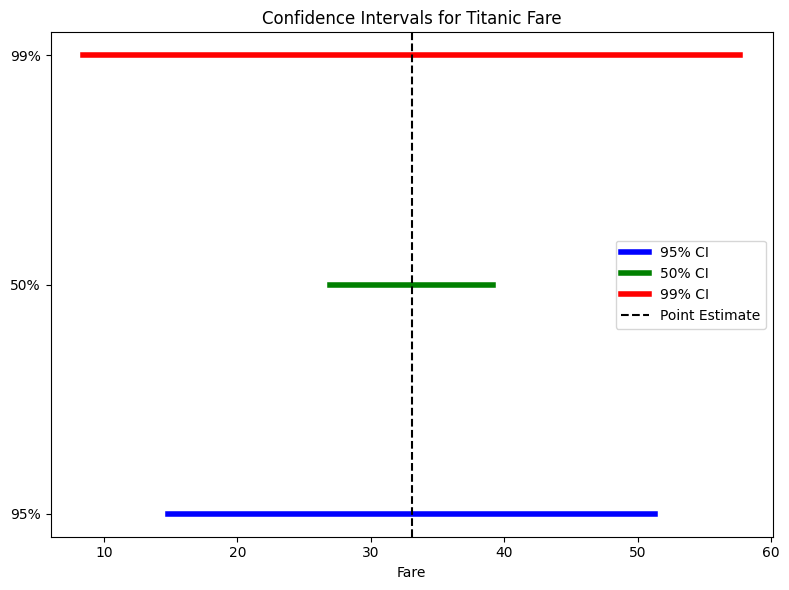

In [7]:
# ---------------------------------------------------
# STEP 7: Visualization
# ---------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['blue', 'green', 'red']

for i, cl in enumerate(confidence_levels):
    lower, upper, _ = results[cl]
    ax.plot([lower, upper], [i, i], color=colors[i], linewidth=4, label=f"{int(cl*100)}% CI")

# Add point estimate line
ax.axvline(point_estimate, color='black', linestyle='--', label='Point Estimate')

# Configure plot
ax.set_yticks(range(len(confidence_levels)))
ax.set_yticklabels([f"{int(cl*100)}%" for cl in confidence_levels])
ax.set_xlabel('Fare')
ax.set_title('Confidence Intervals for Titanic Fare')
ax.legend()
plt.tight_layout()


Explanation:

Plots horizontal bars for each CI.
Adds a dashed line for point estimate.

Output:

A chart showing:

95% CI (widest).
50% CI (narrowest).
99% CI (widest of all).
Point estimate line.



Interpretation:

Visual confirmation of trade-off:

Higher confidence → Wider interval.
Lower confidence → Narrower interval.